In [2]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import pandas as pd

# Load your data
df = pd.read_csv(r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-6\data\data.csv')
df.head()




,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
df.shape

(95662, 16)

In [5]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [7]:
df.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

## 1. Create Aggregate Features

In [8]:
# Group by 'CustomerId' to compute aggregates
df['Total_Transaction_Amount'] = df.groupby('CustomerId')['Amount'].transform('sum')
df['Average_Transaction_Amount'] = df.groupby('CustomerId')['Amount'].transform('mean')
df['Transaction_Count'] = df.groupby('CustomerId')['Amount'].transform('count')
df['Std_Transaction_Amount'] = df.groupby('CustomerId')['Amount'].transform('std')

# Display the updated DataFrame
print("DataFrame after creating aggregate features:")
df[['CustomerId', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Transaction_Amount']].head()


DataFrame after creating aggregate features:


,CustomerId,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount
0,CustomerId_4406,109921.75,923.712185,119,3042.294251
1,CustomerId_4406,109921.75,923.712185,119,3042.294251
2,CustomerId_4683,1000.00,500.000000,2,0.000000
3,CustomerId_988,228727.20,6019.136842,38,17169.241610
4,CustomerId_988,228727.20,6019.136842,38,17169.241610


In [9]:
df.shape

(95662, 20)

## 2.Extract Features from TransactionStartTime

In [10]:
# Convert 'TransactionStartTime' to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract hour, day, month, year
df['Transaction_Hour'] = df['TransactionStartTime'].dt.hour
df['Transaction_Day'] = df['TransactionStartTime'].dt.day
df['Transaction_Month'] = df['TransactionStartTime'].dt.month
df['Transaction_Year'] = df['TransactionStartTime'].dt.year

# Display the updated DataFrame
print("DataFrame after extracting features from TransactionStartTime:")
df[['TransactionStartTime', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year']].head()


DataFrame after extracting features from TransactionStartTime:


,TransactionStartTime,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018


In [11]:
df.shape 

(95662, 24)

## 3. Encode Categorical Variables

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## # Checking frequency distribution with styling enabled for each column

In [13]:
print("\nFrequency distribution for 'ProviderId':")
df.stb.freq(['ProviderId'], style=True)


Frequency distribution for 'ProviderId':


,ProviderId,count,percent,cumulative_count,cumulative_percent
0,ProviderId_4,"38,189",39.92%,"38,189",39.92%
1,ProviderId_6,"34,186",35.74%,"72,375",75.66%
2,ProviderId_5,"14,542",15.20%,"86,917",90.86%
3,ProviderId_1,"5,643",5.90%,"92,560",96.76%
4,ProviderId_3,"3,084",3.22%,"95,644",99.98%
5,ProviderId_2,18,0.02%,"95,662",100.00%


In [14]:
print("\nFrequency distribution for 'ProductId':")
df.stb.freq(['ProductId'], style=True)


Frequency distribution for 'ProductId':


,ProductId,count,percent,cumulative_count,cumulative_percent
0,ProductId_6,"32,635",34.11%,"32,635",34.11%
1,ProductId_3,"24,344",25.45%,"56,979",59.56%
2,ProductId_10,"15,384",16.08%,"72,363",75.64%
3,ProductId_15,"11,964",12.51%,"84,327",88.15%
4,ProductId_1,"2,885",3.02%,"87,212",91.17%
5,ProductId_4,"2,403",2.51%,"89,615",93.68%
6,ProductId_21,"1,512",1.58%,"91,127",95.26%
7,ProductId_11,"1,377",1.44%,"92,504",96.70%
8,ProductId_19,965,1.01%,"93,469",97.71%
9,ProductId_14,789,0.82%,"94,258",98.53%


In [15]:
print("\nFrequency distribution for 'ProductCategory':")
df.stb.freq(['ProductCategory'], style=True)



Frequency distribution for 'ProductCategory':


,ProductCategory,count,percent,cumulative_count,cumulative_percent
0,financial_services,"45,405",47.46%,"45,405",47.46%
1,airtime,"45,027",47.07%,"90,432",94.53%
2,utility_bill,"1,920",2.01%,"92,352",96.54%
3,data_bundles,"1,613",1.69%,"93,965",98.23%
4,tv,"1,279",1.34%,"95,244",99.56%
5,ticket,216,0.23%,"95,460",99.79%
6,movies,175,0.18%,"95,635",99.97%
7,transport,25,0.03%,"95,660",100.00%
8,other,2,0.00%,"95,662",100.00%


In [16]:
print("\nFrequency distribution for 'ChannelId':")
df.stb.freq(['ChannelId'],style=True)




Frequency distribution for 'ChannelId':


,ChannelId,count,percent,cumulative_count,cumulative_percent
0,ChannelId_3,"56,935",59.52%,"56,935",59.52%
1,ChannelId_2,"37,141",38.83%,"94,076",98.34%
2,ChannelId_5,"1,048",1.10%,"95,124",99.44%
3,ChannelId_1,538,0.56%,"95,662",100.00%


## One-Hot Encoding for Each Column

In [17]:
# Display original columns
print("Original DataFrame columns:")
print(df.columns)

Original DataFrame columns:
Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year'],
      dtype='object')


In [18]:
# One-Hot Encoding for 'ProviderId'
df_provider_one_hot = pd.get_dummies(df, columns=['ProviderId'], drop_first=True)
print("\nDataFrame after One-Hot Encoding of 'ProviderId':")
print("Updated DataFrame columns after One-Hot Encoding of 'ProviderId':")
df_provider_one_hot.head()


DataFrame after One-Hot Encoding of 'ProviderId':
Updated DataFrame columns after One-Hot Encoding of 'ProviderId':


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProductId,ProductCategory,ChannelId,...,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProductId_10,airtime,ChannelId_3,...,3042.294251,2,15,11,2018,False,False,False,False,True
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProductId_6,financial_services,ChannelId_2,...,3042.294251,2,15,11,2018,False,False,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProductId_1,airtime,ChannelId_3,...,0.000000,2,15,11,2018,False,False,False,False,True
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProductId_21,utility_bill,ChannelId_3,...,17169.241610,3,15,11,2018,False,False,False,False,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProductId_6,financial_services,ChannelId_2,...,17169.241610,3,15,11,2018,False,False,True,False,False


In [19]:
# Convert boolean columns (if any) to integers (0 and 1)
df_provider_one_hot = df_provider_one_hot.astype({col: 'int' for col in df_provider_one_hot.columns if df_provider_one_hot[col].dtype == 'bool'})

# Display the updated DataFrame with integers instead of boolean values
print("\nDataFrame with boolean columns converted to integers (0 and 1):")
df_provider_one_hot.head()


DataFrame with boolean columns converted to integers (0 and 1):


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProductId,ProductCategory,ChannelId,...,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProductId_10,airtime,ChannelId_3,...,3042.294251,2,15,11,2018,0,0,0,0,1
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProductId_6,financial_services,ChannelId_2,...,3042.294251,2,15,11,2018,0,0,1,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProductId_1,airtime,ChannelId_3,...,0.000000,2,15,11,2018,0,0,0,0,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProductId_21,utility_bill,ChannelId_3,...,17169.241610,3,15,11,2018,0,0,0,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProductId_6,financial_services,ChannelId_2,...,17169.241610,3,15,11,2018,0,0,1,0,0


In [20]:
df1 = df_provider_one_hot
df1.shape

(95662, 28)

In [21]:
# One-Hot Encoding for 'ProductId'
df_product_one_hot = pd.get_dummies(df1, columns=['ProductId'], drop_first=True)
print("\nDataFrame after One-Hot Encoding of 'ProductId':")
df_product_one_hot.head()



DataFrame after One-Hot Encoding of 'ProductId':


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProductCategory,ChannelId,Amount,...,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,airtime,ChannelId_3,1000.0,...,False,False,False,False,False,False,False,False,False,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,financial_services,ChannelId_2,-20.0,...,False,False,False,False,False,False,True,False,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,airtime,ChannelId_3,500.0,...,False,False,False,False,False,False,False,False,False,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,utility_bill,ChannelId_3,20000.0,...,False,False,False,False,False,False,False,False,False,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,financial_services,ChannelId_2,-644.0,...,False,False,False,False,False,False,True,False,False,False


In [22]:
# Convert boolean columns (if any) to integers (0 and 1)
df_product_one_hot = df_product_one_hot.astype({col: 'int' for col in df_product_one_hot.columns if df_product_one_hot[col].dtype == 'bool'})

# Display the updated DataFrame
print("\nDataFrame after One-Hot Encoding of 'ProductId':")
df_product_one_hot.head()


DataFrame after One-Hot Encoding of 'ProductId':


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProductCategory,ChannelId,Amount,...,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,airtime,ChannelId_3,1000.0,...,0,0,0,0,0,0,0,0,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,financial_services,ChannelId_2,-20.0,...,0,0,0,0,0,0,1,0,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,airtime,ChannelId_3,500.0,...,0,0,0,0,0,0,0,0,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,utility_bill,ChannelId_3,20000.0,...,0,0,0,0,0,0,0,0,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,financial_services,ChannelId_2,-644.0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
df2 =df_product_one_hot
df2.shape

(95662, 49)

In [24]:
# One-Hot Encoding for 'ProductCategory'
df_product_category_one_hot = pd.get_dummies(df2, columns=['ProductCategory'], drop_first=True)
print("\nDataFrame after One-Hot Encoding of 'ProductCategory':")
df_product_category_one_hot.head()





DataFrame after One-Hot Encoding of 'ProductCategory':


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ChannelId,Amount,Value,...,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ChannelId_3,1000.0,1000,...,0,0,False,False,False,False,False,False,False,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ChannelId_2,-20.0,20,...,0,0,False,True,False,False,False,False,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ChannelId_3,500.0,500,...,0,0,False,False,False,False,False,False,False,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ChannelId_3,20000.0,21800,...,0,0,False,False,False,False,False,False,False,True
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ChannelId_2,-644.0,644,...,0,0,False,True,False,False,False,False,False,False


In [25]:
# Convert boolean columns (if any) to integers (0 and 1)
df_product_category_one_hot = df_product_category_one_hot.astype({col: 'int' for col in df_product_category_one_hot.columns if df_product_category_one_hot[col].dtype == 'bool'})

# Display the updated DataFrame
print("\nDataFrame after One-Hot Encoding of 'ProductCategory':")

df_product_category_one_hot.head()


DataFrame after One-Hot Encoding of 'ProductCategory':


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ChannelId,Amount,Value,...,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ChannelId_3,1000.0,1000,...,0,0,0,0,0,0,0,0,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ChannelId_2,-20.0,20,...,0,0,0,1,0,0,0,0,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ChannelId_3,500.0,500,...,0,0,0,0,0,0,0,0,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ChannelId_3,20000.0,21800,...,0,0,0,0,0,0,0,0,0,1
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ChannelId_2,-644.0,644,...,0,0,0,1,0,0,0,0,0,0


In [26]:
# Assign the one-hot encoded product category DataFrame to df3
df3 = df_product_category_one_hot

# Display the shape of df3
print("Shape of df3:", df3.shape)

Shape of df3: (95662, 56)


In [27]:
# One-Hot Encoding for 'ChannelId'
df_channel_one_hot = pd.get_dummies(df3, columns=['ChannelId'], drop_first=True)

# Convert boolean columns (if any) to integers (0 and 1)
df_channel_one_hot = df_channel_one_hot.astype({
    col: 'int' for col in df_channel_one_hot.columns if df_channel_one_hot[col].dtype == 'bool'
})

# Display the updated DataFrame after One-Hot Encoding of 'ChannelId'
print("\nDataFrame after One-Hot Encoding of 'ChannelId':")
print("Updated DataFrame columns:")
print(df_channel_one_hot.columns)
df4 = df_channel_one_hot
df4.head()



DataFrame after One-Hot Encoding of 'ChannelId':
Updated DataFrame columns:
Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'Produ

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,1000.0,1000,2018-11-15 02:18:49+00:00,...,0,0,0,0,0,0,0,0,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,-20.0,20,2018-11-15 02:19:08+00:00,...,1,0,0,0,0,0,0,1,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,500.0,500,2018-11-15 02:44:21+00:00,...,0,0,0,0,0,0,0,0,1,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,20000.0,21800,2018-11-15 03:32:55+00:00,...,0,0,0,0,0,0,1,0,1,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,-644.0,644,2018-11-15 03:34:21+00:00,...,1,0,0,0,0,0,0,1,0,0


In [28]:
# Label Encoding for 'CustomerId'
le_customer = LabelEncoder()
df4['CustomerId_Label'] = le_customer.fit_transform(df4['CustomerId'])

# Display the updated DataFrame
print("\nDataFrame after Label Encoding of 'CustomerId':")
df4[['CustomerId', 'CustomerId_Label']].head()



DataFrame after Label Encoding of 'CustomerId':


,CustomerId,CustomerId_Label
0,CustomerId_4406,2584
1,CustomerId_4406,2584
2,CustomerId_4683,2806
3,CustomerId_988,3733
4,CustomerId_988,3733


In [29]:
df =df4
df.shape

(95662, 59)

In [30]:
# Target encoding example using mean of a target variable (e.g., 'FraudResult')
mean_target = df.groupby('CustomerId')['FraudResult'].mean()
df['CustomerId_TargetEnc'] = df['CustomerId'].map(mean_target)

# Display the updated DataFrame
print("\nDataFrame after Target Encoding of 'CustomerId':")
df[['CustomerId', 'CustomerId_TargetEnc']].head()



DataFrame after Target Encoding of 'CustomerId':


,CustomerId,CustomerId_TargetEnc
0,CustomerId_4406,0.0
1,CustomerId_4406,0.0
2,CustomerId_4683,0.0
3,CustomerId_988,0.0
4,CustomerId_988,0.0


In [31]:
# Frequency Encoding for 'CustomerId'
customer_id_counts = df['CustomerId'].value_counts()
df['CustomerId_FrequencyEnc'] = df['CustomerId'].map(customer_id_counts)

# Display the updated DataFrame
print("\nDataFrame after Frequency Encoding of 'CustomerId':")
df[['CustomerId', 'CustomerId_FrequencyEnc']].head()



DataFrame after Frequency Encoding of 'CustomerId':


,CustomerId,CustomerId_FrequencyEnc
0,CustomerId_4406,119
1,CustomerId_4406,119
2,CustomerId_4683,2
3,CustomerId_988,38
4,CustomerId_988,38


In [32]:
# Hashing Encoding for 'CustomerId' using Python's built-in hash function
df['CustomerId_HashEnc'] = df['CustomerId'].apply(lambda x: hash(x) % 10)  # Using modulo to limit the range of hash values

# Display the updated DataFrame
print("\nDataFrame after Hash Encoding of 'CustomerId':")
df[['CustomerId', 'CustomerId_HashEnc']].head()


DataFrame after Hash Encoding of 'CustomerId':


,CustomerId,CustomerId_HashEnc
0,CustomerId_4406,3
1,CustomerId_4406,3
2,CustomerId_4683,2
3,CustomerId_988,2
4,CustomerId_988,2


In [33]:
print(df.shape)
df.head()

(95662, 62)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CustomerId_Label,CustomerId_TargetEnc,CustomerId_FrequencyEnc,CustomerId_HashEnc
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,1000.0,1000,2018-11-15 02:18:49+00:00,...,0,0,0,0,1,0,2584,0.0,119,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,-20.0,20,2018-11-15 02:19:08+00:00,...,0,0,0,1,0,0,2584,0.0,119,3
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,500.0,500,2018-11-15 02:44:21+00:00,...,0,0,0,0,1,0,2806,0.0,2,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,20000.0,21800,2018-11-15 03:32:55+00:00,...,0,0,1,0,1,0,3733,0.0,38,2
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,-644.0,644,2018-11-15 03:34:21+00:00,...,0,0,0,1,0,0,3733,0.0,38,2


In [34]:
# Drop the 'CurrencyCode' and 'CountryCode' columns from the DataFrame
df = df.drop(['CurrencyCode', 'CountryCode'], axis=1)

# Display the updated DataFrame
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CustomerId_Label,CustomerId_TargetEnc,CustomerId_FrequencyEnc,CustomerId_HashEnc
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,...,0,0,0,0,1,0,2584,0.0,119,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,20,2018-11-15 02:19:08+00:00,2,0,...,0,0,0,1,0,0,2584,0.0,119,3
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,500,2018-11-15 02:44:21+00:00,2,0,...,0,0,0,0,1,0,2806,0.0,2,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,...,0,0,1,0,1,0,3733,0.0,38,2
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,644,2018-11-15 03:34:21+00:00,2,0,...,0,0,0,1,0,0,3733,0.0,38,2


In [35]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy',
       'FraudResult', 'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'Pro


## 4. Handling Missing Values

# 1. Imputation

In [36]:
# Fill missing values in numerical columns with the mean
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

# Fill missing values in numerical columns with the median
df['Value'] = df['Value'].fillna(df['Value'].median())

# Fill missing values in categorical columns with the mode (most frequent value)
df['ProductCategory_other'] = df['ProductCategory_other'].fillna(df['ProductCategory_other'].mode()[0])


# 2. Removal

In [37]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Drop columns with missing values
df_cleaned = df.dropna(axis=1)


## 5. Normalize/Standardize Numerical Features

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize
numerical_cols = ['Amount', 'Value', 'Total_Transaction_Amount']

# Initialize MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized values
df[numerical_cols].head()


,Amount,Value,Total_Transaction_Amount
0,0.092004,0.000101,0.557522
1,0.091910,0.000002,0.557522
2,0.091958,0.000050,0.556944
3,0.093750,0.002206,0.558153
4,0.091853,0.000065,0.558153


Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to standardize
numerical_cols = ['Amount', 'Value', 'Total_Transaction_Amount']

# Initialize StandardScaler to standardize features
scaler = StandardScaler()

# Fit the scaler and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the standardized values
df[numerical_cols].head()


,Amount,Value,Total_Transaction_Amount
0,-0.046371,-0.072291,0.170118
1,-0.054643,-0.080251,0.170118
2,-0.050426,-0.076352,0.165122
3,0.107717,0.096648,0.175567
4,-0.059704,-0.075183,0.175567


## Feature Engineering using Weight of Evidence (WoE) and Information Value (IV)

# Overview
In credit scoring, Weight of Evidence (WoE) is a technique used to transform categorical variables into numerical values that reflect the relationship between the predictor and the target variable (e.g., likelihood of default). Information Value (IV) quantifies the predictive power of an independent variable in relation to the target variable.

## 1. Constructing a Default Estimator (Proxy)
To construct a default estimator, follow these steps:

a. Visualizing Transactions in the RFMS Space
RFMS stands for Recency, Frequency, Monetary Value, and Score. You can visualize transactions using scatter plots or other visualization techniques to understand the distribution of users based on these metrics.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   Amount                              95662 non-null  float64            
 6   Value                               95662 non-null  float64            
 7   TransactionStartTime                95662 non-null  datetime64[ns, UTC]
 8   PricingStrategy                     95662 non-null  int64              
 9   FraudResult                         956

In [41]:
df.describe()

,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CustomerId_Label,CustomerId_TargetEnc,CustomerId_FrequencyEnc,CustomerId_HashEnc
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,9.495000e+04,95662.000000,95662.000000,...,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,-1.056507e-15,-8.913166e-18,2.255974,0.002018,-4.207014e-16,6.717846e+03,392.982982,1.803696e+04,12.447722,15.902898,...,0.000261,0.013370,0.020071,0.388252,0.595168,0.010955,1961.152067,0.002018,392.982982,4.229914
std,1.000005e+00,1.000005e+00,0.732924,0.044872,1.000005e+00,8.568352e+04,878.631072,8.929570e+04,4.846964,8.962822,...,0.016164,0.114854,0.140243,0.487355,0.490862,0.104093,1046.685310,0.025216,878.631072,2.784799
min,-8.164376e+00,-8.039691e-02,0.000000,0.000000,-4.646278e+00,-4.250000e+05,1.000000,0.000000e+00,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-5.488653e-02,-7.817959e-02,2.000000,0.000000,1.678282e-01,1.260812e+03,32.000000,3.206563e+03,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1131.000000,0.000000,32.000000,2.000000
50%,-4.637114e-02,-7.229109e-02,2.000000,0.000000,1.743188e-01,2.272951e+03,93.000000,5.896327e+03,13.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1969.000000,0.000000,93.000000,4.000000
75%,-3.177332e-02,-3.980285e-02,2.000000,0.000000,1.975924e-01,4.080464e+03,273.000000,1.038269e+04,17.000000,24.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2891.000000,0.000000,273.000000,7.000000
max,8.007129e+01,8.016556e+01,4.000000,1.000000,3.992660e+00,8.601821e+06,4091.000000,3.309916e+06,23.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3741.000000,1.000000,4091.000000,9.000000


In [42]:
# missing check
df.stb.missing()

,missing,total,percent
Std_Transaction_Amount,712,95662,0.744287
TransactionId,0,95662,0.000000
AccountId,0,95662,0.000000
BatchId,0,95662,0.000000
CustomerId,0,95662,0.000000
Amount,0,95662,0.000000
Value,0,95662,0.000000
TransactionStartTime,0,95662,0.000000
PricingStrategy,0,95662,0.000000
FraudResult,0,95662,0.000000


## Unvariate analysis

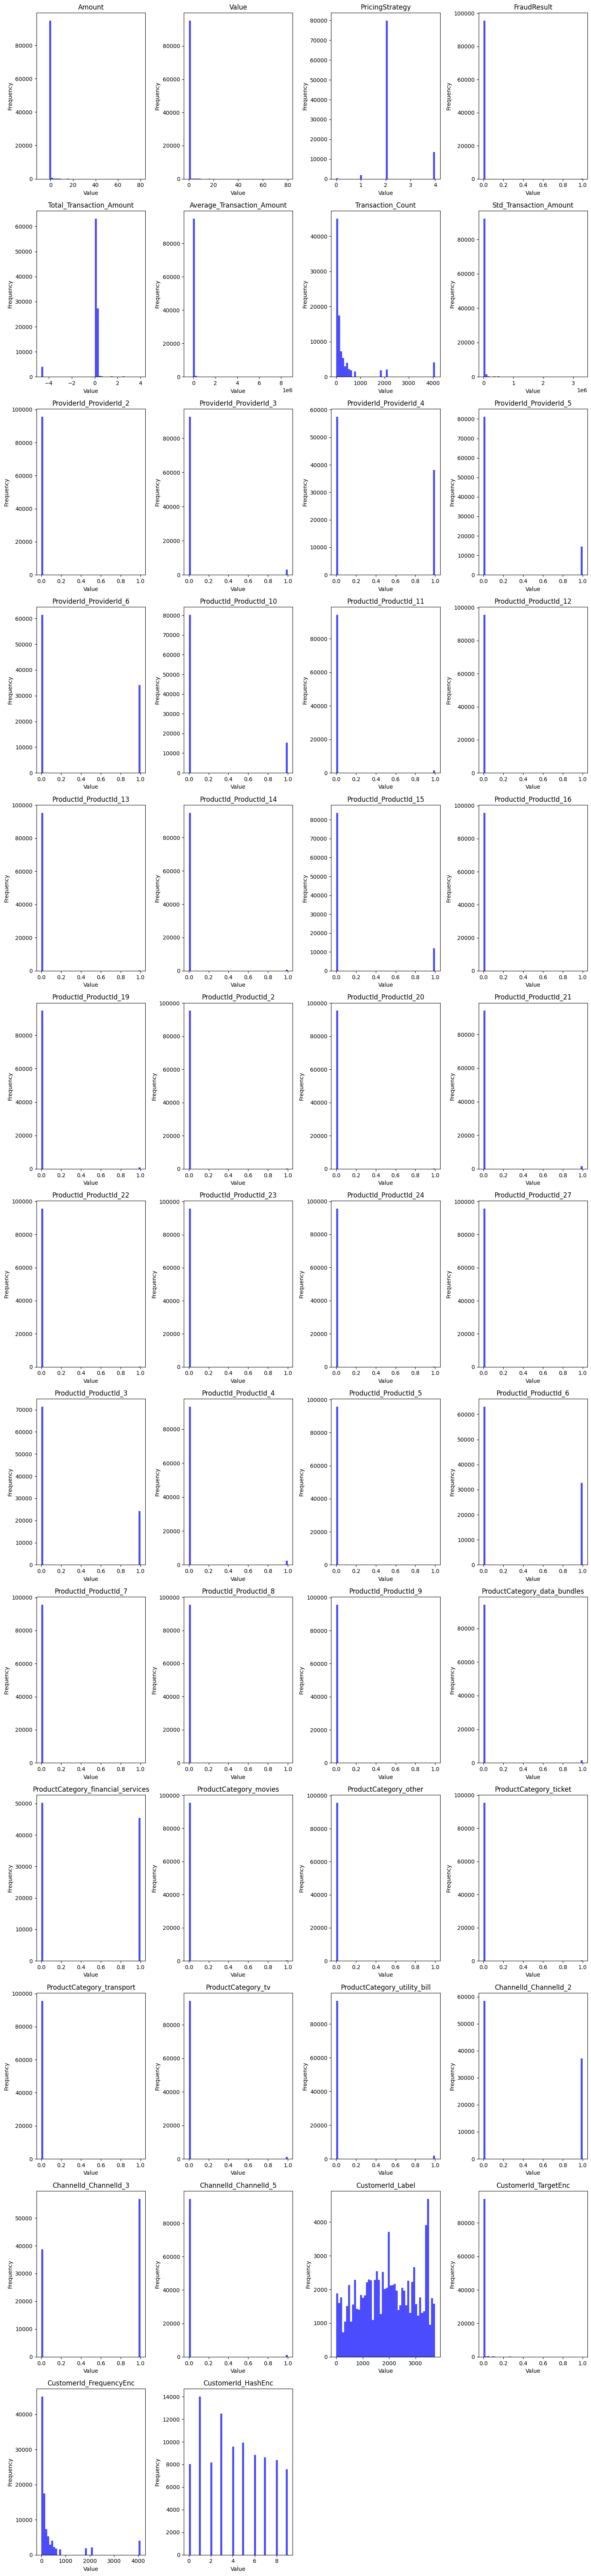

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns
df_num = df.select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows and columns for subplots
num_cols = 4  # Number of columns for the subplot grid
num_rows = int(np.ceil(len(df_num.columns) / num_cols))  # Calculate the number of rows needed

# Create histograms for each numeric column
plt.figure(figsize=(15, 5 * num_rows))  # Adjust height based on the number of rows
for i, column in enumerate(df_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplots
    plt.hist(df_num[column], bins=50, color='blue', alpha=0.7)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Bivariate Analysis


In [44]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

In [45]:
numeric_df.corr()

,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CustomerId_Label,CustomerId_TargetEnc,CustomerId_FrequencyEnc,CustomerId_HashEnc
Amount,1.000000,0.989692,-0.061931,0.557370,0.116830,0.694881,-0.057588,0.479779,-0.001611,-0.003905,...,0.021441,0.009368,0.012204,-0.068600,0.067850,-0.010054,-0.011970,0.419219,-0.057588,-0.009759
Value,0.989692,1.000000,-0.017020,0.566739,0.035650,0.684791,0.014352,0.483188,0.000474,-0.024104,...,0.021055,0.007806,0.012840,-0.038817,0.037252,-0.004016,0.015739,0.427952,0.014352,-0.030323
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821,-0.504173,-0.069259,0.406005,-0.050903,0.007423,-0.131597,...,-0.010941,-0.050343,-0.068798,-0.018822,-0.023969,0.215908,0.197830,-0.035657,0.406005,-0.128881
FraudResult,0.557370,0.566739,-0.033821,1.000000,0.063469,0.339021,-0.015938,0.365098,0.008295,-0.008636,...,0.028099,-0.005234,0.013499,-0.033429,0.032811,-0.004732,0.010927,0.561949,-0.015938,-0.015842
Total_Transaction_Amount,0.116830,0.035650,-0.504173,0.063469,1.000000,0.168129,-0.861501,0.156144,-0.026900,0.225701,...,0.003419,0.024430,0.027138,-0.267560,0.259145,0.019727,-0.285458,0.112944,-0.861501,0.225849
Average_Transaction_Amount,0.694881,0.684791,-0.069259,0.339021,0.168129,1.000000,-0.082875,0.696192,0.006647,0.008856,...,0.018706,0.001994,-0.000159,-0.055466,0.053294,-0.004368,-0.017226,0.603296,-0.082875,-0.014043
Transaction_Count,-0.057588,0.014352,0.406005,-0.015938,-0.861501,-0.082875,1.000000,-0.022182,0.043682,-0.171367,...,-0.006681,-0.024724,-0.043394,0.260776,-0.248411,-0.033488,0.311322,-0.028363,1.000000,-0.241296
Std_Transaction_Amount,0.479779,0.483188,-0.050903,0.365098,0.156144,0.696192,-0.022182,1.000000,0.019049,-0.014319,...,0.030680,-0.002672,-0.004192,-0.051021,0.049717,-0.001314,0.015073,0.691871,-0.022182,-0.047971
Transaction_Hour,-0.001611,0.000474,0.007423,0.008295,-0.026900,0.006647,0.043682,0.019049,1.000000,-0.019464,...,-0.003095,0.007668,0.008618,0.006758,-0.004227,-0.009970,0.030612,0.019439,0.043682,-0.010204
Transaction_Day,-0.003905,-0.024104,-0.131597,-0.008636,0.225701,0.008856,-0.171367,-0.014319,-0.019464,1.000000,...,0.000825,-0.012671,0.002690,-0.022272,0.023137,-0.003521,-0.102630,0.002730,-0.171367,0.023856
